# Principal Component Analysis - K-Means Clustering and Logistic Regression on cancer_data

In [4]:
#Library importing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import itertools

## Data Loading and Editing

In [4]:
df = pd.read_csv("cancer_data.csv")

In [14]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [26]:
#The first 5 indexes
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [28]:
#The last 5 indexes
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [22]:
#Data type and null values checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [30]:
#Removing the unnecessarly columns
df = df.drop(columns= ['Unnamed: 32', 'id'])

In [32]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [34]:
#Basic statistical informations
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Data Exploratory Analysis

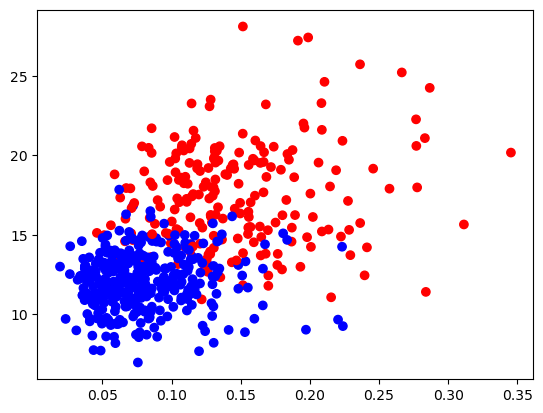

In [37]:
#Scatter plot for compactness_mean-radius_mean
#I added colors to M and B because i wanted to see more detailed relations.
categories = df.diagnosis
categoriesmap = categories.map({'M': 0, 'B': 1}).values 
colors = np.array(['r','b'])
plt.scatter(df['compactness_mean'], df['radius_mean'],c=colors[categoriesmap])
plt.show()

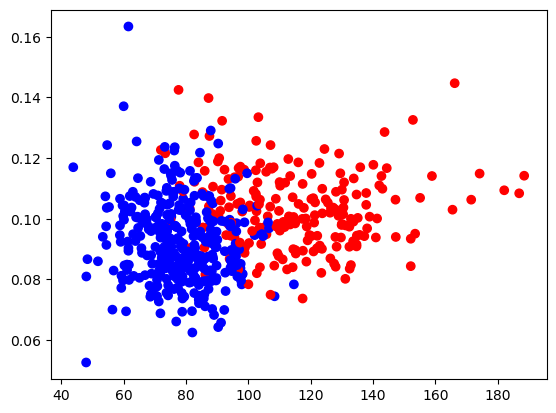

In [39]:
#Scatter plot for perimeter_mean-smoothness_mean
#Again I added colours.
plt.scatter(df['perimeter_mean'], df['smoothness_mean'],c=colors[categoriesmap])
plt.show()

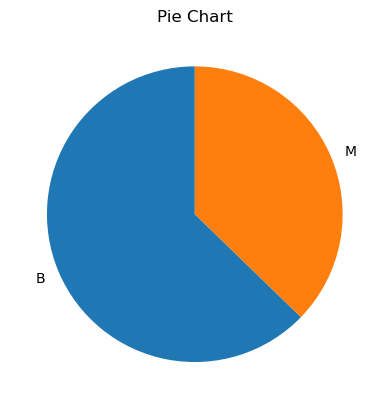

In [41]:
#Pie Chart to see M-B ratio
category_counts = categories.value_counts()

labels = category_counts.index  
sizes = category_counts.values 

plt.pie(sizes, labels=labels, startangle=90)

plt.title('Pie Chart')

plt.show()

### Encoding for the categorical data - M : 1 | B : 0

In [44]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [46]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


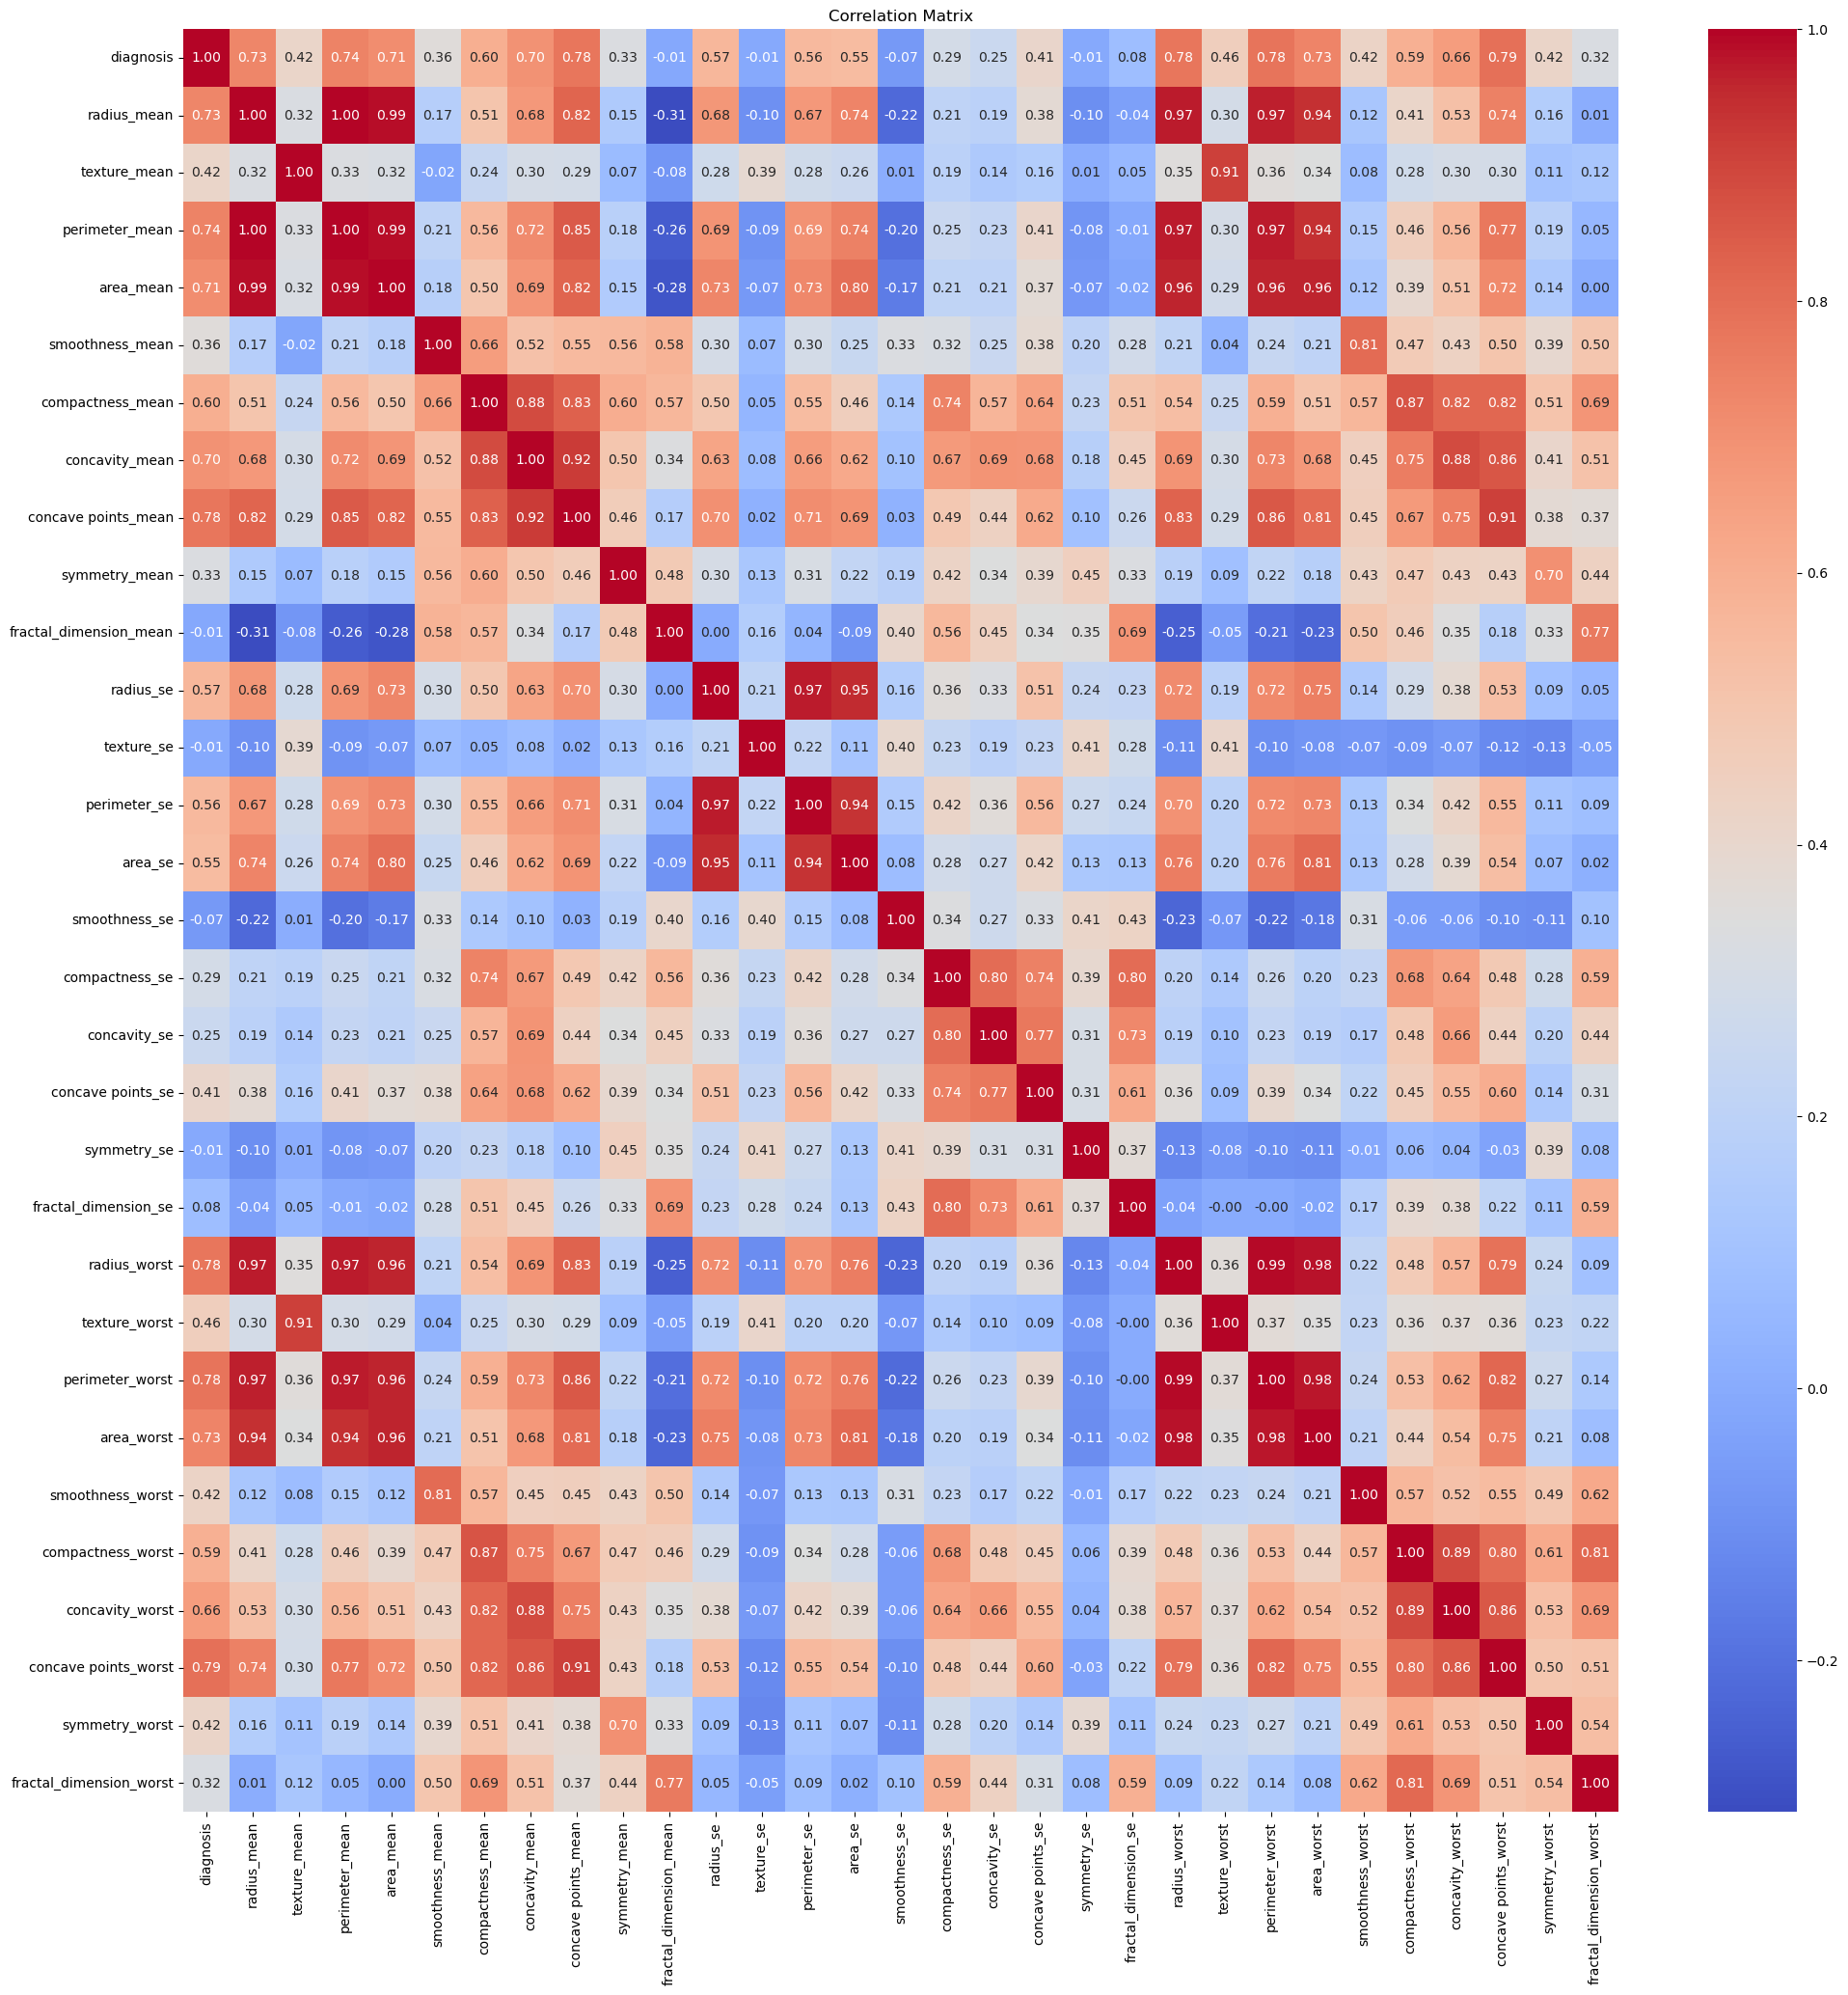

In [48]:
#Correlation matrix and Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(24, 24))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

## PCA and T-SNE visualization

### Standardization

In [52]:
#Standard Scaling for features and assign it to new dataframe
scaler = StandardScaler()
dfs = scaler.fit_transform(df.drop(columns = 'diagnosis'))

In [54]:
dfs

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [56]:
type(dfs)

numpy.ndarray

In [58]:
#Here i saw a numpy array, not a dataframe so i need to convert it to pandas dataframe

In [60]:
#Again I dropped the target columns because of shape.
dfs = pd.DataFrame(dfs, columns=df.drop(columns = 'diagnosis').columns)

In [62]:
type(dfs)

pandas.core.frame.DataFrame

In [64]:
#Ready

In [66]:
#I added target column to scaled df, dfs.
dfs['diagnosis'] = df['diagnosis']

In [68]:
dfs

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,1
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,1
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,1
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,1


### Visualization

In [71]:
#For use the color map:
PALETTE = sns.color_palette('deep', n_colors=2)
CMAP = ListedColormap(PALETTE.as_hex())

In [73]:
#Function to plot 2D 
def plot_2d(x, y, title, xlabel="1st eigenvector", ylabel="2nd eigenvector"):
    sns.set_style("darkgrid")

    plt.scatter(x, y,
        c=dfs['diagnosis'],
        cmap=CMAP,
        s=70)

    plt.title(title, fontsize=20, y=1.03)

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

In [75]:
#features contains column names and target contains diagnosis column
features = dfs.drop(columns='diagnosis').columns.tolist()
target = dfs.diagnosis

In [81]:
#Applying PCA

In [77]:
pca = PCA()
points = pca.fit_transform(dfs[features])

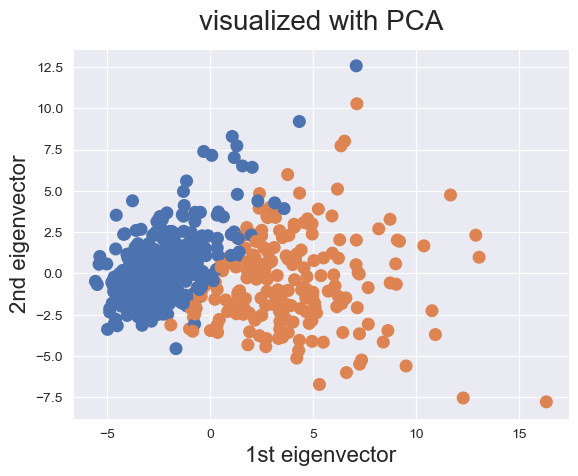

In [79]:
plot_2d(
    x = points[:,0],
    y = points[:,1],
    title = 'visualized with PCA')

In [83]:
#Applying T-SNE
tsne = TSNE(n_components=2, n_iter=1000, random_state=42)
points = tsne.fit_transform(dfs[features])

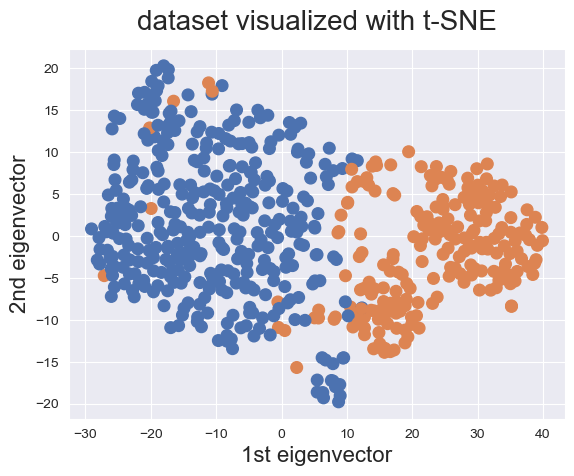

In [85]:
plot_2d(
    x = points[:, 0],
    y = points[:, 1],
    title = 'dataset visualized with t-SNE')

In [87]:
#Overall both look homogeneous but PCA looks more homogeneous. Also t-sne has more leaked dots

## Explained and Cumulative variance ratio

In [90]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [92]:
print("Explained Variance Ratio for each component:")
for i, ratio in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: {ratio:.4f}")

Explained Variance Ratio for each component:
Principal Component 1: 0.4427
Principal Component 2: 0.1897
Principal Component 3: 0.0939
Principal Component 4: 0.0660
Principal Component 5: 0.0550
Principal Component 6: 0.0402
Principal Component 7: 0.0225
Principal Component 8: 0.0159
Principal Component 9: 0.0139
Principal Component 10: 0.0117
Principal Component 11: 0.0098
Principal Component 12: 0.0087
Principal Component 13: 0.0080
Principal Component 14: 0.0052
Principal Component 15: 0.0031
Principal Component 16: 0.0027
Principal Component 17: 0.0020
Principal Component 18: 0.0018
Principal Component 19: 0.0016
Principal Component 20: 0.0010
Principal Component 21: 0.0010
Principal Component 22: 0.0009
Principal Component 23: 0.0008
Principal Component 24: 0.0006
Principal Component 25: 0.0005
Principal Component 26: 0.0003
Principal Component 27: 0.0002
Principal Component 28: 0.0001
Principal Component 29: 0.0000
Principal Component 30: 0.0000


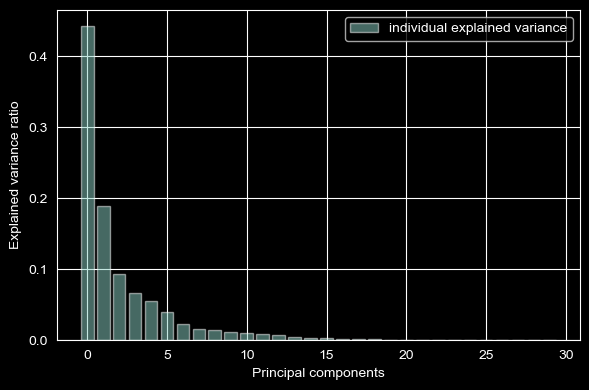

In [94]:
#Plotting explained variance ratio per components
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(30), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [96]:
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative Explained Variance:", cumulative_variance)

Cumulative Explained Variance: [0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


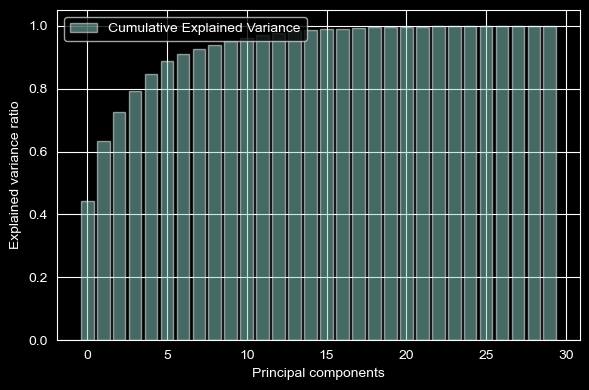

In [98]:
#Plotting cumulative variance ratio per components
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(30), cumulative_variance, alpha=0.5, align='center',
            label='Cumulative Explained Variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

## Clustering the data

In [103]:
#function gives us the most variance two columns
def pca(data, n):

    if type(n) == int:

        pca = PCA(n_components = n )
        pca.fit(data)
        df_pca = pca.transform(data)
        return df_pca

    else:
        return data

In [107]:
#Converting two components to a dataframe

In [105]:
df_pca = pca(dfs, 2)
df_pca = pd.DataFrame(df_pca, columns = ['P1','P2'])
df_pca.head()

,P1,P2
0,9.200959,1.988220
1,2.451039,-3.772454
2,5.771537,-1.058914
3,7.124952,10.286359
4,3.981010,-1.938210


Text(0, 0.5, 'PCA 2')

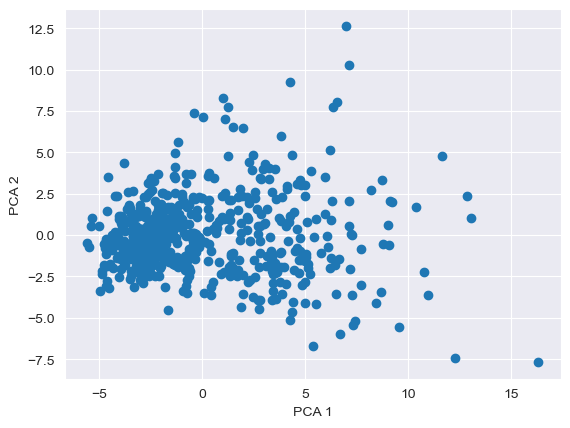

In [109]:
#Scatter plot of our components
plt.scatter(df_pca.P1, df_pca.P2)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [111]:
df_pca.shape

(569, 2)

In [113]:
#Function to Apply K Means clustering on the original features and build the ”Elbow Curve"
def cluster_Wcss(data, k ):

    wcss = []

    for i in range(1, k):
        kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10,5))
    plt.plot(range(1,11), wcss)
    plt.title('The Elbow Curve')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

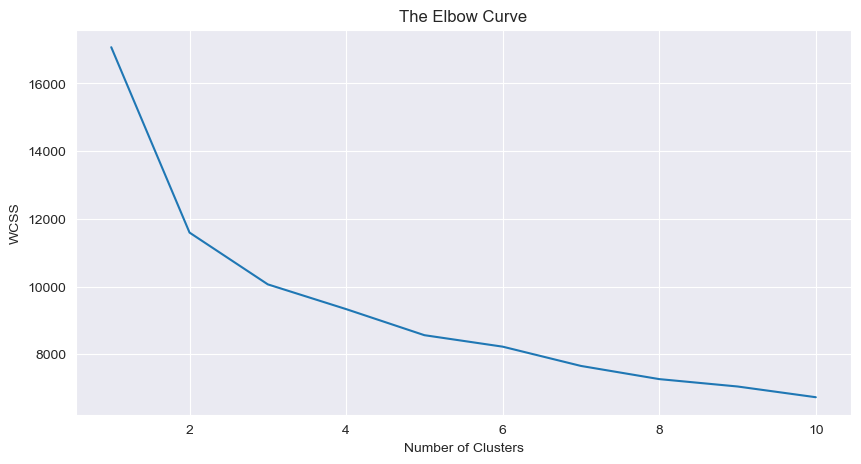

In [115]:
cluster_Wcss(dfs.drop(columns = 'diagnosis'), 11)

In [117]:
#two lists (param_data and param_model), where each list contains dictionaries representing a unique combination of parameters.
param_data = { 'n' : [2,'False'] }
param_data = [dict(zip(param_data.keys(), v)) for v in itertools.product(*param_data.values())]

param_model = {
    'n_clusters': [3, 4, 5 , 6],
    'init' : ['k-means++'],
    'random_state' :[16]
}
param_model = [dict(zip(param_model.keys(), v)) for v in itertools.product(*param_model.values())]

In [119]:
param_data

[{'n': 2}, {'n': 'False'}]

In [121]:
#This function performs clustering using K-means with different combinations of PCA components and model parameters.
#For each combination, it computes metrics like Silhouette Score and Davies-Bouldin Index, and stores the results in a structured DataFrame
def cluster(data, param_data, param_model):

    last =[]

    for dp in param_data:

        X = pca(data, dp['n'])
        X = pd.DataFrame(X)
        for mp in param_model:

            model = KMeans(**mp)

            y_means = model.fit_predict(X)
            centers = model.cluster_centers_

            silhouette = silhouette_score(X, y_means)
            davies_bouldin = davies_bouldin_score(X, y_means)

            res = {}
            res['Model'] = 'Kmeans'
            res['Random_State'] = mp['random_state']

            res['Pca'] = dp['n']
            res['Params'] = mp
            res['Centers'] = centers
            res['Silhouette'] = silhouette
            res['Davies_Bouldin'] = davies_bouldin

            last.append(res)

    result = pd.DataFrame(last, columns=['Model','Pca','Params', 'Centers', 'Silhouette', 'Davies_Bouldin'])

    return result

In [123]:
result =  cluster(dfs.drop(columns = 'diagnosis'),  param_data, param_model)
result = result.sort_values(by=['Silhouette'], ascending=False)
result.head()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

,Model,Pca,Params,Centers,Silhouette,Davies_Bouldin
0,Kmeans,2,"{'n_clusters': 3, 'init': 'k-means++', 'random...","[[4.909745770189661, -1.8925535591995073], [-2...",0.491007,0.909166
1,Kmeans,2,"{'n_clusters': 4, 'init': 'k-means++', 'random...","[[3.0916711754430746, -1.769727505844532], [-2...",0.465382,0.886389
2,Kmeans,2,"{'n_clusters': 5, 'init': 'k-means++', 'random...","[[3.11125654459923, -1.6827057342419014], [-1....",0.363034,0.955598
3,Kmeans,2,"{'n_clusters': 6, 'init': 'k-means++', 'random...","[[3.0151163618564825, -2.0256093662218704], [-...",0.352117,0.996520
4,Kmeans,False,"{'n_clusters': 3, 'init': 'k-means++', 'random...","[[1.5403154702671424, 0.6024431206621988, 1.54...",0.315135,1.540622


In [125]:
#I picked the best scoring parameters based on Silhouette Score
result.Params[0]

{'n_clusters': 3, 'init': 'k-means++', 'random_state': 16}

In [127]:
# Best Results

bp = result.Params[0]
bn = result.Pca[0]
bc = result.Centers[0]

In [129]:
# Training the model with the best parameters

X = pca(dfs.drop(columns = 'diagnosis'), bn)
X = pd.DataFrame(X, columns = ['P1','P2'])

model = KMeans(**bp)

y_means = model.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


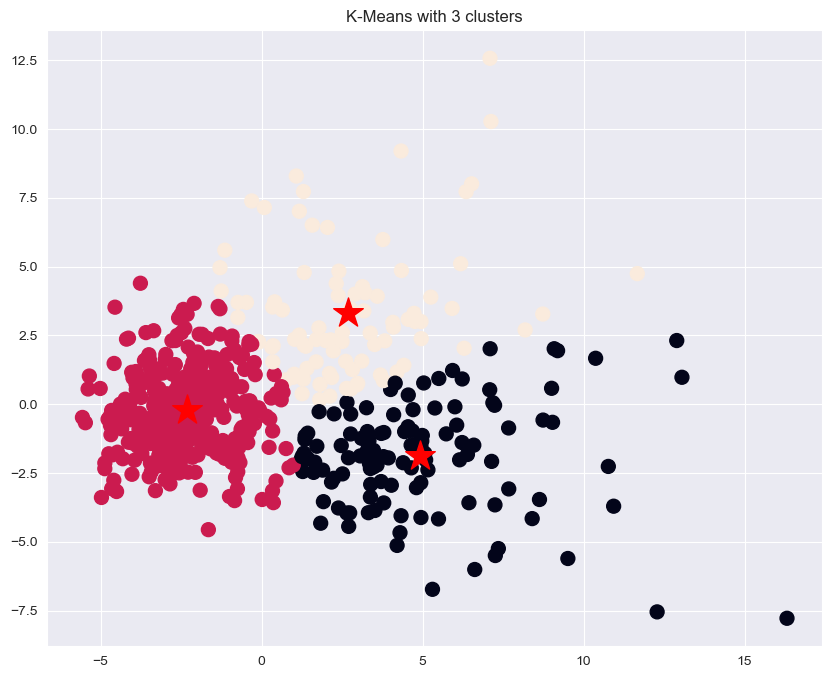

In [131]:
#Visualization of the result

plt.figure(figsize=(10, 8))

plt.title('K-Means with 3 clusters')

plt.scatter(X.P1, X.P2, c=y_means, s=100)

plt.scatter(bc[:,0], bc[:,1], color='red', marker='*', s=500)

## Logistic Regression Models

### The first Model | Using Original Features

In [136]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [138]:
#Original scaled features
X = dfs.drop(['diagnosis'], axis=1)
y = dfs['diagnosis']

In [140]:
#Train | Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [142]:
#Score printer function - Accuracy, Classification Report and Confusion Matrix
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [144]:
#Building model and showing scores
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.74%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.984127    0.993151  0.987437    0.988639      0.987505
recall       0.995984    0.973154  0.987437    0.984569      0.987437
f1-score     0.990020    0.983051  0.987437    0.986535      0.987411
support    249.000000  149.000000  0.987437  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[248   1]
 [  4 145]]

Test Result:
Accuracy Score: 98.25%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.990654   0.968750  0.982456    0.979702      0.982584
recall       0.981481   0.984127  0.982456    0.982804      0.982456
f1-score     0.986047   0.976378  0.982456    0.981212      0.982484
support    108.000000  63.000000  0.982456  171.000000    171.00000

### Second Model | Using dimension-reduced dataset

In [147]:
X_2d = df_pca
y_2d = dfs['diagnosis']

In [149]:
X_2d

,P1,P2
0,9.200959,1.988220
1,2.451039,-3.772454
2,5.771537,-1.058914
3,7.124952,10.286359
4,3.981010,-1.938210
...,...,...
564,6.476365,-3.548332
565,3.848194,-3.577757
566,1.320365,-1.915875
567,10.382666,1.713790


In [151]:
y_2d

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [153]:
#Train | Test Split
X_trained, X_tested, y_trained, y_tested = train_test_split(X_2d, y_2d, test_size=0.3, random_state=42)

In [155]:
##Building model and showing scores
lr_clf_2d = LogisticRegression(solver='liblinear')
lr_clf_2d.fit(X_trained, y_trained)

print_score(lr_clf_2d, X_trained, y_trained, X_tested, y_tested, train=True)
print_score(lr_clf_2d, X_trained, y_trained, X_tested, y_tested, train=False)

Train Result:
Accuracy Score: 95.48%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.963855    0.939597  0.954774    0.951726      0.954774
recall       0.963855    0.939597  0.954774    0.951726      0.954774
f1-score     0.963855    0.939597  0.954774    0.951726      0.954774
support    249.000000  149.000000  0.954774  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[240   9]
 [  9 140]]

Test Result:
Accuracy Score: 98.25%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.990654   0.968750  0.982456    0.979702      0.982584
recall       0.981481   0.984127  0.982456    0.982804      0.982456
f1-score     0.986047   0.976378  0.982456    0.981212      0.982484
support    108.000000  63.000000  0.982456  171.000000    171.00000

### The first model gave us better train result because that have more training data but second model which is even have less data to train, gave us the same test result with the first model. I think, this shows us that, our two components represents well the rest of data and Logistic Regression model could be predict as same as the first LR model.